## 6.4 Supervised Machine Learning Regression

This script includes the following topics,


        I.  Importing libraries and data
        II. Hypothesis
        III.Explore visuall data of testing variables
        IV. Reshape the variables into NumPy arrays and put them into separate objects
        V.  Split the data into a training set and a test set
        VI. Data preparation for regression analysis
        VII.  Regression analysis

### I.Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Create path

path = r'C:\Users\inesh\Documents\Learning\CF_Data Analytics course\Data Analytics Immesion\Achievement 6\Hotel Booking Data Analysis'

In [7]:
# Importing the cleaned dataset

df_hotel_cleaned = pd.read_pickle(os.path.join(path, 'II. Data Set', 'Prepared Data', 'df_hotel_cleaned_6.2.pkl'))

In [9]:
df_hotel_cleaned.head(5)

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,customer_origin_country,State,City,Destination Country,...,No. Of People,Check-in date,Number_of_days_booked,No_of_rooms_booked,Hotel Name,Hotel Rating,Total_booking_Price_SG$,Profit Margin,Room_price_per_day_SG$,Price Category
0,DDMY00001,2010-01-01,2024-03-04 10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,...,1,2010-01-12,8,1,Hotel Triton,4.3,243,0.25,243.000000,Mid Price
1,DDID00002,2010-01-01,2024-03-04 09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,Colombia,...,3,2010-01-21,1,2,Enchanted Isle,4.2,312,0.24,156.000000,Mid Price
2,DDSG00003,2010-01-01,2024-03-04 11:52:56,SG00001,Female,31,Singapore,Central,Rochor,Germany,...,3,2010-01-02,7,2,Seacoast Hotel,4.5,338,0.20,169.000000,Mid Price
3,DDSG00004,2010-01-01,2024-03-04 13:44:40,SG00002,Male,28,Singapore,North,Yishun,Canada,...,3,2010-02-15,4,2,Night In Paradise,4.2,254,0.13,127.000000,Low Price
4,DDKH00005,2010-01-01,2024-03-04 05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,...,5,2010-01-03,3,3,Tiny Digs Hotel,4.6,313,0.17,104.333333,Low Price


### II. Hypothesis

### Hypothesis created based on: There is a positive correlation between "Hotel Rating" and "Total_booking_Price_SG$", that hotels with higher ratings tend to have higher booking prices.

        Null Hypothesis(HO)       = The hotels with higher ratings don't have the chance to charge higher booking prices.
        Alternative Hypothesis(H1)= The hotels with higher ratings have the chance to charge higher booking prices

        Independent variable: Hotel Rating
        Dependant variable: Total_booking_Price_SG$ (Price)



### III.Explore visuall data of testing variables

In [10]:
df_hotel_cleaned['Hotel Rating'].describe()

count    66536.000000
mean         4.288508
std          0.275518
min          3.300000
25%          4.200000
50%          4.300000
75%          4.500000
max          4.700000
Name: Hotel Rating, dtype: float64

In [13]:
df_hotel_cleaned['Hotel Rating'].median()

4.3

In [11]:
df_hotel_cleaned['Total_booking_Price_SG$'].describe()

count    66536.000000
mean       214.053730
std        108.126539
min         35.000000
25%        125.000000
50%        199.000000
75%        293.000000
max        578.000000
Name: Total_booking_Price_SG$, dtype: float64

In [14]:
df_hotel_cleaned['Total_booking_Price_SG$'].median()

199.0

##### Check for extrem values of variables

C:\Users\inesh\AppData\Local\Temp\ipykernel_26228\645305958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hotel_cleaned['Hotel Rating'], bins=25)
C:\Users\inesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


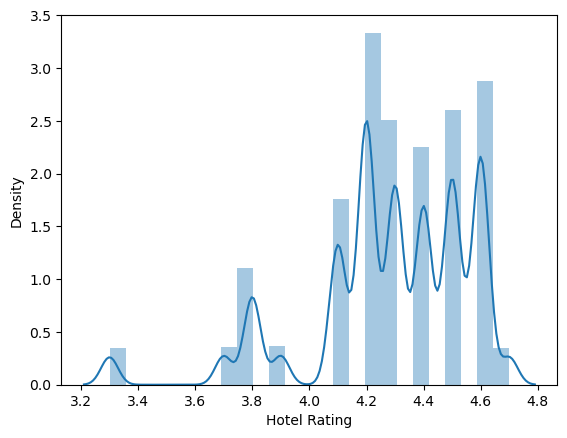

In [15]:
sns.distplot(df_hotel_cleaned['Hotel Rating'], bins=25) 

plt.savefig('histo price room density.png')

C:\Users\inesh\AppData\Local\Temp\ipykernel_26228\2371450428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hotel_cleaned['Total_booking_Price_SG$'], bins=25)
C:\Users\inesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


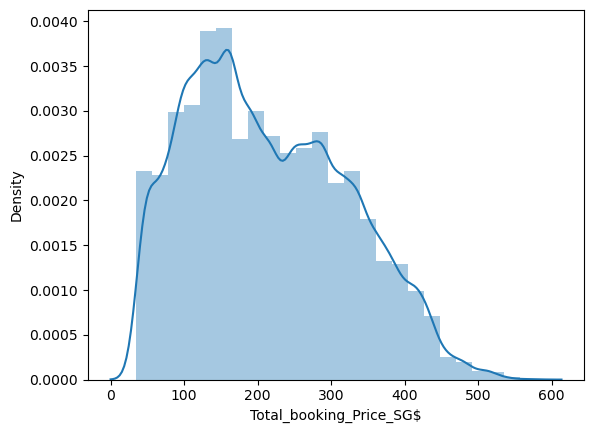

In [17]:
sns.distplot(df_hotel_cleaned['Total_booking_Price_SG$'], bins=25) 

plt.savefig('histo hotel rating density.png')

#### According to histograms there are no extrem values in both hotel rating & Total_booking_Price_SG$

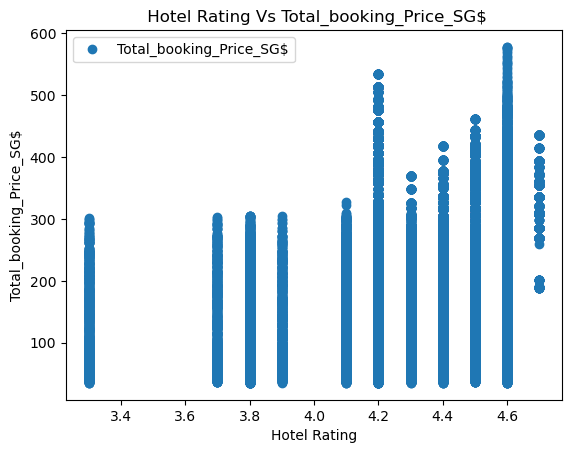

<Figure size 640x480 with 0 Axes>

In [21]:
# Create a scatterplot using matplotlib to check variables plot against each other.

df_hotel_cleaned.plot(x = 'Hotel Rating', y='Total_booking_Price_SG$',style='o') 
plt.title(' Hotel Rating Vs Total_booking_Price_SG$')  
plt.xlabel('Hotel Rating')  
plt.ylabel('Total_booking_Price_SG$')  
plt.show()

plt.savefig('Hotel Rating Vs Total_booking_Price_SG$.png')


### IV Reshape the variables into NumPy arrays and put them into separate objects

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

x = df_hotel_cleaned['Hotel Rating'].values.reshape(-1,1)
y = df_hotel_cleaned['Total_booking_Price_SG$'].values.reshape(-1,1)

In [26]:
x

array([[4.3],
       [4.2],
       [4.5],
       ...,
       [4.4],
       [4.2],
       [4.3]])

In [27]:
y

array([[243],
       [312],
       [338],
       ...,
       [318],
       [173],
       [182]], dtype=int64)

###  V.  Split the data into  a training set and a test set

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [30]:
x_train

array([[4.6],
       [3.8],
       [4.6],
       ...,
       [4.4],
       [4.5],
       [3.3]])

In [31]:
x_test

array([[4.3],
       [4.2],
       [3.8],
       ...,
       [4.1],
       [4.7],
       [4.2]])

### VI. Data preparation for regression analysis

In [32]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [34]:
# Fit the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [35]:
# Predict the values of y using X.

y_predicted = regression.predict(x_test)

### VII.  Regression analysisline.png')

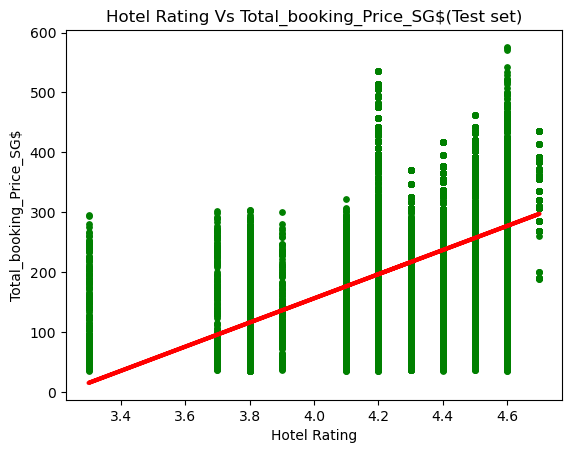

<Figure size 640x480 with 0 Axes>

In [41]:
# Create a plot _regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='green', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Hotel Rating Vs Total_booking_Price_SG$(Test set)')
plot_test.xlabel('Hotel Rating')
plot_test.ylabel('Total_booking_Price_SG$')
plot_test.show()

plt.savefig('Hotel Rating Vs Total_booking_Price_SG$(Test set) regression line.png')

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [43]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[201.65555529]]
Mean squared error:  8706.40298875684
R2 score:  0.2515462435251835


#### There is some level of correlation between the independent and dependent variables, as indicated by the non-zero R2 score. But, the mean squared error suggests that there is still some error in the predictions made by the model.

In [45]:
y_predicted

array([[216.91484155],
       [196.74928603],
       [116.08706391],
       ...,
       [176.5837305 ],
       [297.57706367],
       [196.74928603]])

In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,307,216.914842
1,160,196.749286
2,195,116.087064
3,146,196.749286
4,204,196.749286
5,288,257.245953
6,148,257.245953
7,267,196.749286
8,289,216.914842
9,318,237.080397


In [51]:
##Compare how the regression fits the train data set

# Predict.

y_predicted_train = regression.predict(x_train) # This is predicting x_train!

In [48]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[201.65555529]]
Mean squared error:  8623.842191946314
R2 score:  0.26391856866142815


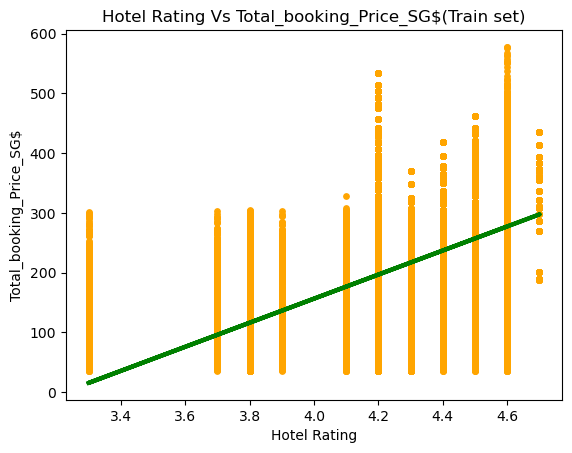

<Figure size 640x480 with 0 Axes>

In [50]:
# Visualizing the train data set results.

plot_test = plt
plot_test.scatter(x_train, y_train, color='orange', s = 15)
plot_test.plot(x_train, y_predicted_train, color='green', linewidth =3)
plot_test.title('Hotel Rating Vs Total_booking_Price_SG$(Train set)')
plot_test.xlabel('Hotel Rating')
plot_test.ylabel('Total_booking_Price_SG$')
plot_test.show()

plt.savefig('Hotel Rating Vs Total_booking_Price_SG$(training set) regression line.png')

#### Comparison of test & train data models

Slope: The slope of the regression line for both the test and train data is identical (When a one-unit change in the independent variable, the dependent variable changes)

Mean squared error: The model performs slightly better on the training set in terms of predicting the target variable.

R2 Score: The R2 score for the train data (0.2639) is slightly higher than that of the test data (0.2515)

Summary: The model performs slightly better on the training set compared to the test set (slightly lower mean squared error and slightly higher R2 score). The differences are relatively small, but suggesting that the model generalizes reasonably well to unseen data.